$$f(H^{(l)}, A) = \sigma(AXW^{(l)})$$
$$f(H^{(l)}, A) = \sigma(\hat{D}^{\frac{-1}{2}} \hat{A} \hat{D}^{\frac{-1}{2}}H^{(l)}W^{(l)})$$

In [98]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

In [99]:
random.seed(123)

def generate_random_network(num_nodes):
    # 创建一个空的无向图
    G = nx.Graph()

    # 添加节点
    G.add_nodes_from(range(1, num_nodes+1))

    # 计算最大边数
    max_edges = (num_nodes * (num_nodes-1)) // 2

    # 计算允许的最大边数
    max_allowed_edges = int(max_edges * 0.1)

    # 随机生成边的数量
    num_edges = random.randint(num_nodes-1, max_allowed_edges)

    # 添加随机边
    edges = set()
    nodes = list(G.nodes)
    start_node = random.choice(nodes)
    visited = {start_node}
    while len(edges) < num_edges:
        # 随机选择一个已访问过的节点和一个未访问过的节点
        node1 = random.choice(list(visited))
        node2 = random.choice(list(set(nodes) - visited))

        # 添加边并更新已访问过的节点集合
        edges.add((node1, node2))
        visited.add(node2)

        if len(visited) == num_nodes:
            break

    # 添加边到图中
    G.add_edges_from(edges)

    return G


Graph with 50 nodes and 49 edges


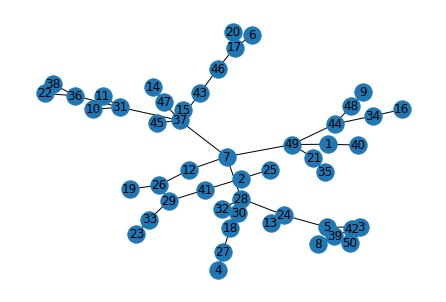

In [100]:
# 节点数量
num_nodes = 50

# 生成随机网络
G = generate_random_network(num_nodes)
print(G)
# 绘制随机网络
nx.draw(G, with_labels=True)
plt.show()


In [101]:
def adjacency_matrix(network):
    # 获取节点列表
    nodes = sorted(network.nodes())
    
    # 创建一个与节点数量相同的零矩阵
    matrix = [[0] * len(nodes) for _ in range(len(nodes))]
    
    # 遍历边，更新邻接矩阵
    for node1, node2 in network.edges():
        matrix[node1-1][node2-1] = 1
        matrix[node2-1][node1-1] = 1
    
    return matrix


In [102]:
A = adjacency_matrix(G)
A = np.array(A)
for row in A:
    print(row)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 

In [103]:
def generate_random_matrix(n, m):
    # 生成随机矩阵
    matrix = np.random.rand(n, m)
    
    # 行归一化
    row_sums = matrix.sum(axis=1)
    normalized_matrix = matrix / row_sums[:, np.newaxis]
    
    return normalized_matrix


In [104]:
features_num = 300
X = generate_random_matrix(num_nodes, features_num)
for row in X:
    print(row)

[6.18455550e-03 4.89852274e-03 4.02352540e-03 1.50673024e-03
 5.12602562e-03 4.02904405e-03 2.63489291e-03 1.86983281e-03
 5.11135852e-03 1.54235208e-03 8.77356592e-04 5.73666074e-03
 4.51776735e-03 4.47850845e-03 6.72113121e-04 2.18157803e-03
 1.28121181e-04 4.26753597e-03 1.75369978e-03 9.96703858e-04
 7.49182597e-04 2.89924313e-03 3.99503046e-03 3.44239537e-03
 3.60453724e-03 6.13473074e-03 3.19849591e-03 1.05250895e-03
 1.28609921e-03 4.05422746e-03 2.94394048e-03 1.98089878e-03
 1.36209116e-03 1.77546312e-03 4.19852110e-03 5.84869785e-03
 2.58474946e-03 1.79908372e-03 6.35146354e-03 2.44508159e-03
 5.28242232e-03 6.33128544e-03 1.86008535e-03 6.58271548e-03
 5.51230220e-03 2.76977123e-03 4.29534954e-03 6.48611284e-03
 1.40794212e-03 3.69770855e-03 1.68798818e-04 5.61063164e-03
 3.45050105e-03 6.26001817e-03 5.81860617e-03 5.13331298e-03
 1.69724416e-03 2.28409232e-03 4.15665704e-03 4.35545855e-03
 2.43549689e-03 5.78979706e-03 6.07391899e-03 6.29437001e-03
 1.25273516e-03 6.377711

In [105]:
layers = [features_num, 256, 240,220, 210, 200,180,170, 160, 150, 128, 100, 64, 32, 16, 4]
W = []
for idx, hidden_num in enumerate(layers):
    temp = (layers[idx], layers[idx+1])
    temp_W = np.random.randn(temp[0], temp[1])
    W.append(temp_W)
    if idx == len(layers) - 2:
        break
W

[array([[ 0.30885006,  0.43949317, -0.42647856, ..., -0.65488873,
         -2.35787159,  0.67477566],
        [ 0.12500971, -2.01933254,  2.78452051, ...,  0.98393604,
         -2.38695664,  0.02237065],
        [ 0.41890796,  0.89122912, -0.29712814, ..., -0.13749018,
         -1.10082605, -1.4411409 ],
        ...,
        [-0.26555047, -1.86434629, -0.68655016, ..., -0.68391269,
          0.12013966,  1.77097788],
        [ 1.2121944 , -1.63052754, -0.08605663, ...,  0.56145054,
         -1.5120139 , -0.6374909 ],
        [ 0.15972298,  0.33631445,  1.25036079, ...,  0.42742198,
         -0.36842133, -1.23056771]]),
 array([[-1.42033354, -1.12481591,  0.44174429, ..., -1.48124573,
         -0.77289494,  1.24289136],
        [ 0.47917757,  0.48217339,  0.95350733, ...,  0.43182142,
          1.10738096, -0.15563319],
        [ 1.89088345,  1.04813918, -1.06862171, ..., -0.85881715,
          0.06160605,  1.12070241],
        ...,
        [-1.150126  , -0.07750664, -1.15786347, ...,  

In [106]:
for idx, w in enumerate(W):
    print(f'layer{idx}: shape:{w.shape}')

layer0: shape:(300, 256)
layer1: shape:(256, 240)
layer2: shape:(240, 220)
layer3: shape:(220, 128)
layer4: shape:(128, 100)
layer5: shape:(100, 64)
layer6: shape:(64, 32)
layer7: shape:(32, 16)
layer8: shape:(16, 4)


In [107]:
H = X
for idx, w in enumerate(W):
    print(idx)
    H = np.maximum(A.dot(H).dot(w), 0)
    print(H.shape)

0
(50, 256)
1
(50, 240)
2
(50, 220)
3
(50, 128)
4
(50, 100)
5
(50, 64)
6
(50, 32)
7
(50, 16)
8
(50, 4)


In [108]:
print(H)

[[1.00077492e+09 9.37027213e+08 2.56573140e+09 0.00000000e+00]
 [1.80199781e+08 2.46055561e+08 2.69146522e+08 0.00000000e+00]
 [3.43892876e+08 3.18170664e+08 8.75463694e+08 0.00000000e+00]
 [1.65482523e+08 1.62927856e+08 4.38887755e+08 0.00000000e+00]
 [1.10462600e+09 1.38314279e+09 2.12435610e+09 0.00000000e+00]
 [2.36249411e+08 2.74877100e+08 3.88578345e+08 0.00000000e+00]
 [4.47337061e+09 4.56282092e+09 1.06414912e+10 0.00000000e+00]
 [4.30470959e+07 5.02860778e+07 8.71642244e+07 0.00000000e+00]
 [1.55806948e+08 1.30204132e+08 4.44003983e+08 0.00000000e+00]
 [1.52853457e+09 1.79234543e+09 2.67933546e+09 0.00000000e+00]
 [1.52853457e+09 1.79234543e+09 2.67933546e+09 0.00000000e+00]
 [2.85255219e+09 3.62741095e+09 5.07494104e+09 0.00000000e+00]
 [8.00047148e+08 1.01575059e+09 1.51677140e+09 0.00000000e+00]
 [1.05487642e+09 1.26158624e+09 1.84023377e+09 0.00000000e+00]
 [1.85127526e+09 2.04196437e+09 4.00798964e+09 0.00000000e+00]
 [1.55865326e+08 1.30402914e+08 4.44067513e+08 0.000000

In [109]:
neighbors = list(G.neighbors(37))
for nei in neighbors:
    print(H[nei])

[1.55865326e+08 1.30402914e+08 4.44067513e+08 0.00000000e+00]
[1.33332523e+09 1.58548086e+09 2.29437554e+09 0.00000000e+00]
[43047095.88878404 50286077.83350793 87164224.43705615        0.        ]
[7.92115180e+08 1.06267972e+09 1.43631821e+09 0.00000000e+00]
[1.10943010e+09 1.06753782e+09 2.81681155e+09 0.00000000e+00]
[1.19834048e+09 1.09791908e+09 3.14642965e+09 0.00000000e+00]
